## Missing Value Clustering

This section aims to identify the patterns of missing value and cluster them together.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
from tslearn.clustering import TimeSeriesKMeans
import pickle

mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.dpi'] = 90.

In [4]:
df = pd.read_csv('dataset/worldbank/API.csv')
meta_country = pd.read_csv('dataset/worldbank/Metadata_Country_API_19_DS2_en_csv_v2_3159902.csv')
meta_indicator = pd.read_csv('dataset/worldbank/Metadata_Indicator_API_19_DS2_en_csv_v2_3159902.csv')

## Missing value redefined

Fill null value with 0, and fill not null value with 1

In [5]:
# Get  columns whose data type is float
floatColumns = df.dtypes[df.dtypes == np.float]

# list of columns whose data type is float
listOfFloatColumnNames = list(floatColumns.index)

print(listOfFloatColumnNames)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [8]:
# Get  columns whose data type is object
objectColumns = df.dtypes[df.dtypes == np.object]

# list of columns whose data type is object
listOfObjectColumnNames = list(objectColumns.index)

print(listOfObjectColumnNames)

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']


In [6]:
df_years = df[listOfFloatColumnNames]
df_years.tail(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
20213,NaN,4.872690,5.001939,5.131188,5.260437,5.337986,5.518935,5.648184,5.777433,5.906682,...,10.856921,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,NaN,NaN
20214,NaN,28.396019,28.615743,28.835466,29.055189,29.223213,29.494636,29.714360,29.934083,30.153806,...,42.393693,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,NaN,NaN
20215,NaN,109850.000000,110700.000000,111550.000000,112400.000000,113050.000000,114100.000000,114950.000000,115800.000000,116650.000000,...,164000.000000,162000.000000,162000.000000,162000.000000,162000.000000,162000.000000,162000.000000,162000.000000,NaN,NaN


In [7]:
# fill nan with 0, and fill not nan with 1

df_years = df_years.fillna(0)
df_years[df_years[listOfFloatColumnNames] > 0] = 1
df_years.tail(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
20213,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
20214,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
20215,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [10]:
df_countryAndIndicator = df[listOfObjectColumnNames]
df_countryAndIndicator.tail(3)

,Country Name,Country Code,Indicator Name,Indicator Code
20213,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS
20214,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS
20215,Zimbabwe,ZWE,Agricultural land (sq. km),AG.LND.AGRI.K2


In [11]:
# concat df_countryAndIndicator and df_years back together

missingValue_df = pd.concat([df_countryAndIndicator, df_years], axis=1)
missingValue_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Aruba,ABW,Urban population,SP.URB.TOTL,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20212,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20213,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
20214,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


## Group by Indicator

In [13]:
# Drop first column of dataframe
df_groupBy_indicatorCode = missingValue_df.iloc[: , 3:]

# Then group by indicator
df_groupBy_indicatorCode = df_groupBy_indicatorCode.groupby(['Indicator Code']).sum()
df_groupBy_indicatorCode

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Indicator Code,,,,,,,,,,,,,,,,,,,,,
AG.LND.AGRI.K2,0.0,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,...,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,257.000000,257.000000,0.000000,0.000000
AG.LND.AGRI.ZS,0.0,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,257.000000,257.000000,0.000000,0.000000
AG.LND.ARBL.ZS,0.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,254.000000,253.000000,253.000000,0.000000,0.000000
AG.LND.EL5M.RU.K2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AG.LND.EL5M.RU.ZS,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP.POP.GROW,1.0,253.827944,259.939605,258.118325,259.075396,256.741722,255.816636,252.042409,251.785325,252.954949,...,206.958570,215.079962,214.338989,215.984994,218.042722,220.237839,220.142434,216.880299,222.115107,220.657950
SP.POP.TOTL,264.0,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,265.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
SP.URB.GROW,1.0,260.534451,259.455940,259.431618,260.527367,260.166431,259.796398,258.723425,258.786008,258.777775,...,210.114922,222.814739,220.907603,219.768962,224.023040,224.820352,226.097969,228.268635,234.095922,236.198614


<AxesSubplot:>

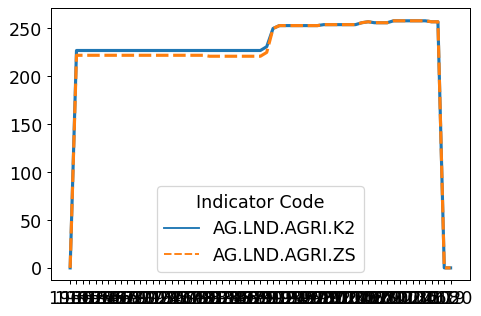

In [21]:
df_0_2 = (df_groupBy_indicatorCode.iloc[0:2 , :]).transpose()

sns.lineplot(data=df_0_2, palette="tab10", linewidth=2.5)

<AxesSubplot:>

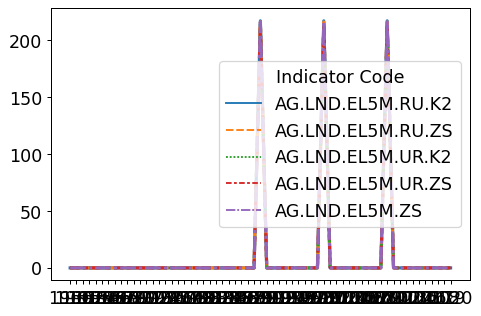

In [20]:
df_3_8 = (df_groupBy_indicatorCode.iloc[3:8 , :]).transpose()

sns.lineplot(data=df_3_8, palette="tab10", linewidth=2.5)

<AxesSubplot:>

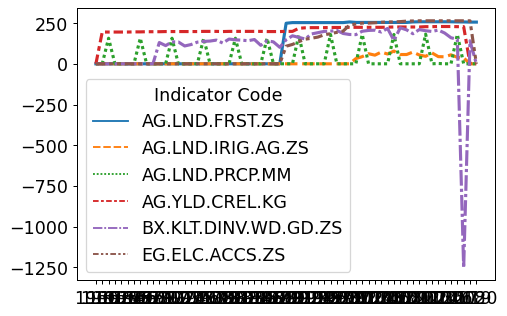

In [22]:
df_9_15 = (df_groupBy_indicatorCode.iloc[9:15 , :]).transpose()

sns.lineplot(data=df_9_15, palette="tab10", linewidth=2.5)

## Time series clustering based on indicator

In [48]:
from tslearn.utils import to_time_series_dataset

df_cluster = []
cluster = 3

X_train = df_groupBy_indicatorCode.iloc[0:10 , :].reindex()
X_train = X_train.set_index['Indicator Code']

colors = ['orange', 'turquoise', 'limegreen']
names = ['orange cluster','turquoise cluster','limegreen cluster']

seed = 1
np.random.seed(seed)


X_train = to_time_series_dataset(X_train.copy())
X_train

# print('Indicators vs time curves')

# km = TimeSeriesKMeans(n_clusters=cluster, verbose=True, random_state=seed, max_iter=10)
# y_pred = km.fit_predict(X_train)
# clusters = pd.Series(data=y_pred, index=df.index)
# clusters

# f, (ax1, ax2, ax3) = plt.subplots(cluster, sharex=True, sharey=True,figsize=(12,8))

# for yi,cl,xs in zip(range(cluster),[0,1,2],[ax1,ax2,ax3]):
#     data = df.rolling(7, axis=1, min_periods=1).mean().fillna(0).loc[clusters[clusters == cl].index]
#     data.T.plot(legend=False, alpha=.2,color='black', ax=xs)
#     data.mean(axis=0).plot(linewidth=3., color=colors[cl], ax=xs)
#     n = len(data)
#     print('{}, N = {}'.format(names[cl], n))
#     df_cluster.append(data) # save df to list

# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax3.spines['right'].set_visible(False)
# ax4.spines['right'].set_visible(False)
# ax5.spines['right'].set_visible(False)

# print("[0:orange, 1:turquoise,2:limegreen]")
# f.subplots_adjust(hspace=0)
# #plt.ylim(-10, 220)
# plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

TypeError: 'method' object is not subscriptable